Classification - Testing different models on one data set

In [1074]:
# For the sake of showcase, to hide warnings
import warnings
warnings.filterwarnings('ignore')

In [1075]:
# Import Libraries and Modules
import pandas as pd
import numpy as np
import datetime as dt
import time as time
from pandas_datareader import data as pdr
from datetime import datetime
import matplotlib.pyplot as plt

In [1076]:
#New change to yahoo API
import yfinance as yf 
yf.pdr_override()

Prepare Data

In [1077]:
# Setting the Date
start = pd.to_datetime('2018-01-01')
end = pd.to_datetime('today')
start, end

(Timestamp('2018-01-01 00:00:00'), Timestamp('2024-03-05 18:08:56.532176'))

In [1078]:
start1 = dt.datetime(2000,1,1)
end1 = dt.datetime.now()
start1, end1

(datetime.datetime(2000, 1, 1, 0, 0),
 datetime.datetime(2024, 3, 5, 18, 8, 56, 538256))

In [1079]:
# Pandas DataReader API (Quandl, Google, Yahoo, AlphaVantage, sooq ...)
Tickers = ['QQQ'] #'AAPL', 'TSLA', 'MSFT', 'AMZN', 'SPY'
Stock_df = pdr.get_data_yahoo(Tickers, start, end) #Previously data.DataReader(Tickers, 'yahoo', start, end)
Stock_df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,156.559998,158.529999,156.169998,158.490005,152.072769,32573300
2018-01-03,158.639999,160.169998,158.610001,160.029999,153.550430,29383600
2018-01-04,160.580002,160.789993,160.080002,160.309998,153.819061,24776100
2018-01-05,161.070007,162.029999,160.770004,161.919998,155.363892,26992300
2018-01-08,161.919998,162.630005,161.860001,162.550003,155.968399,23159100


In [1080]:
Stock_df.reset_index( drop=False, inplace=True)
#Stock_df['Date'] = pd.to_datetime(Stock_df['Date'])
#Stock_df.reset_index( drop=True, inplace=True)
#Stock_df.sort_values( by=['Date'], ascending=True, inplace=True)
#Stock_df.columns = Stock_df.columns.droplevel(-1)
Stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,156.559998,158.529999,156.169998,158.490005,152.072769,32573300
1,2018-01-03,158.639999,160.169998,158.610001,160.029999,153.550430,29383600
2,2018-01-04,160.580002,160.789993,160.080002,160.309998,153.819061,24776100
3,2018-01-05,161.070007,162.029999,160.770004,161.919998,155.363892,26992300
4,2018-01-08,161.919998,162.630005,161.860001,162.550003,155.968399,23159100


In [1081]:
Stock_df.index

RangeIndex(start=0, stop=1553, step=1)

In [1082]:
Stock_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [1083]:
Adj_close = Stock_df.Close
Adj_close.head()

0    158.490005
1    160.029999
2    160.309998
3    161.919998
4    162.550003
Name: Close, dtype: float64

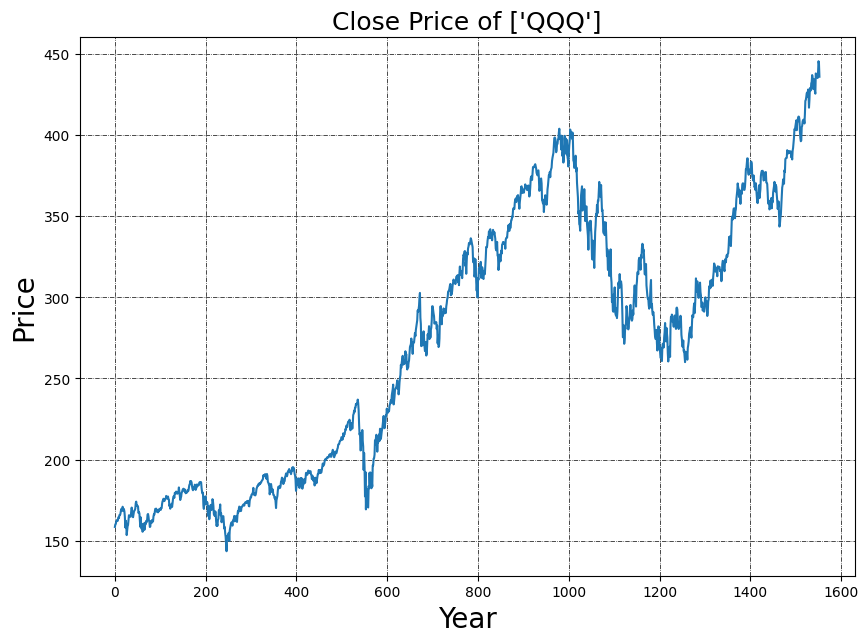

In [1084]:
# Plot the Close price
Stock_df['Close'].plot( figsize = ( 10, 7))
# Define the label for the title of the figure
plt.title( "Close Price of %s" % Tickers, fontsize = 18)
# Define the labels for x-axis and y-axis
plt.ylabel( 'Price', fontsize = 20)
plt.xlabel( 'Year', fontsize = 20)
# Plot the grid lines
plt.grid( which="major", color = 'k', linestyle = '-.', linewidth = 0.5)
# Show the plot
plt.show()

In [1085]:
# Data Aggregations on Closing price
Stock_df['Avg_5'] = Stock_df['Close'].rolling( window = 5, center = False).mean()
Stock_df['Avg_30'] = Stock_df['Close'].rolling( window = 30, center = False).mean()
Stock_df['Avg_365'] = Stock_df['Close'].rolling( window = 365, center = False).mean()
Stock_df['Std_5'] = Stock_df['Close'].rolling( window = 5, center = False).std()
Stock_df['Std_30'] = Stock_df['Close'].rolling( window = 365, center = False).std()
Stock_df['Std_365'] = Stock_df['Close'].rolling( window = 365, center = False).std()
Stock_df['Avg_5/365'] = Stock_df['Avg_5']/Stock_df['Avg_365']
Stock_df['Std_5/365'] = Stock_df['Std_5']/Stock_df['Std_365']

Stock_df = Stock_df.shift( periods = 1)
Stock_df.dropna( how= 'any', axis = 0, inplace = True)

Stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Avg_5,Avg_30,Avg_365,Std_5,Std_30,Std_365,Avg_5/365,Std_5/365
365,2019-06-14,182.479996,183.110001,181.940002,182.639999,177.047318,22844100.0,182.989996,181.043333,172.110822,0.480520,9.324735,9.324735,1.063210,0.051532
366,2019-06-17,183.039993,184.250000,182.839996,183.740005,178.113586,20379500.0,183.107999,180.797666,172.180000,0.589680,9.317066,9.317066,1.063468,0.063290
367,2019-06-18,185.910004,187.720001,185.429993,186.410004,180.701874,48177300.0,183.710001,180.680000,172.252274,1.612206,9.324871,9.324871,1.066517,0.172893
368,2019-06-19,186.660004,187.529999,185.570007,187.110001,181.380417,31672900.0,184.664001,180.709000,172.325699,1.970364,9.336085,9.336085,1.071599,0.211048
369,2019-06-20,189.720001,189.759995,187.160004,188.850006,183.067139,40922000.0,185.750003,180.811666,172.399480,2.530189,9.360005,9.360005,1.077439,0.270319


In [1086]:
# Splitting Data to Training and Test sets
df_train = Stock_df[Stock_df['Date'] < datetime(year = 2019, month = 9, day = 1)]
df_test = Stock_df[Stock_df['Date'] >= datetime(year = 2019, month = 9, day = 1)]
features = ['Avg_5', 'Avg_30', 'Avg_365', 'Std_5', 'Std_30', 'Std_365', 'Avg_5/365', 'Std_5/365']
target = ['Close']
X = df_train[features]
X_test = df_test[features]
y = df_train[target]
y_test = df_test[target]

Linear Regression Model

In [1087]:
# Fitting Linear Regression to the dataset and predicting a new result
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(X, y)
print("Coef: ", linear.coef_)
print("Intercept: ", linear.intercept_)
y_pred_linear = linear.predict(X_test)

Coef:  [[-4.13281718e+01  2.39524541e-01  4.31483494e+01 -4.16057118e+01
   4.96693591e+00  4.96693591e+00  7.28924340e+03  4.06423102e+02]]
Intercept:  [-7567.73250189]


In [1088]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae_l = mean_absolute_error( y_test, y_pred_linear)
mse_l = mean_squared_error( y_test, y_pred_linear)

print("MAE: ", mae_l)
print("MSE: ", mse_l)
print("RMSE: ", np.sqrt(mse_l))
print("Score: ", linear.score(X, y))
#r2_score(y , y_pred_linear)

MAE:  671.4244880072262
MSE:  685357.7921357517
RMSE:  827.8633897786226
Score:  0.8051360446492769


Random Forest Regression Model

In [1089]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, min_samples_split=100, random_state = 42)
regressor.fit(X, y)
#print("Coef: ", regressor.coef_)
#print("Intercept: ", regressor.intercept_)
y_pred_rf = regressor.predict(X_test)

In [1090]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_rf = mean_absolute_error( y_test, y_pred_rf)
mse_rf = mean_squared_error( y_test, y_pred_rf)

print("MAE: ", mae_rf)
print("MSE: ", mse_rf)
print("RMSE: ", np.sqrt(mse_rf))
print("Score: ", regressor.score(X, y))

MAE:  122.12862652095713
MSE:  18790.689020964994
RMSE:  137.07913415602314
Score:  -0.0004271191933657992


XGBoost Model

In [1091]:
from xgboost import XGBRegressor
xgb = XGBRegressor(silent = True)
xgb.fit(X, y)
y_pred_xgb = xgb.predict(X_test)

In [1092]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_xgb = mean_absolute_error( y_test, y_pred_xgb)
mse_xgb = mean_squared_error( y_test, y_pred_xgb)

print("MAE: ", mae_xgb)
print("MSE: ", mse_xgb)
print("RMSE: ", np.sqrt(mse_xgb))
print("Score: ", xgb.score(X, y))

MAE:  121.84244779096908
MSE:  18688.25172040492
RMSE:  136.70498059838536
Score:  0.9999999482709582


Long Short-Term Memory (LSTM) Model

In [2]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

Applying k-Fold Cross Validation

In [1071]:
from sklearn.model_selection import cross_val_score
models = [linear, regressor, xgb]
for model in models:
    accuracies = cross_val_score(estimator = model, X = X, y = y, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: -123.13 %
Standard Deviation: 144.61 %


Accuracy: -878.12 %
Standard Deviation: 1447.02 %
Accuracy: -282.82 %
Standard Deviation: 443.33 %


Applying Grid Search to find the best model and the best parameters

In [1072]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
grid_search = GridSearchCV(estimator = regressor,
                           param_grid = param_grid,               
                           cv = 10,
                           n_jobs = -1,
                           verbose = 2)
grid_search.fit(X, y)
#best_accuracy = grid_search.best_score_
#best_parameters = grid_search.best_params_
#print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
#print("Best Parameters:", best_parameters)
grid_search.best_params_
best_grid = grid_search.best_estimator_


Fitting 10 folds for each of 216 candidates, totalling 2160 fits


In [1073]:
# Visualising the Training set results
# Visualising the Test set results